In [3]:
import pandas as pd

df = pd.read_csv("health.csv")
df.head()


,Burns Management,BM,BM004D,Electrical contact burns,"Electrical contact burns: High voltage - without part of limb / limb loss; Includes % TBSA skin grafted, flap cover, follow-up dressings etc. as deemed necessary; Surgical procedures are required for deep burns that are not amenable to heal with\ndressings alone.",50000,NA,NA.1,Regular Procedure,No
0,Burns Management,BM,BM005A,Chemical burns,Chemical burns: Without significant facial sca...,40000,NaN,NaN,Regular Procedure,No
1,Burns Management,BM,BM005B,Chemical burns,Chemical burns: With significant facial scarri...,60000,NaN,NaN,Regular Procedure,No
2,Burns Management,BM,BM006A,Post Burn Contracture surgeries for Functional...,Post Burn Contracture surgeries for Functional...,50000,NaN,NaN,Regular Procedure,No
3,Burns Management,BM,BM006B,Post Burn Contracture surgeries for Functional...,Post Burn Contracture surgeries for Functional...,50000,NaN,NaN,Regular Procedure,No
4,Emergency Room Packages,ER,ER001A,Laceration - Suturing / Dressing,Laceration - Suturing / Dressing,2000,NaN,NaN,Regular Procedure,No


In [4]:
df.columns = [
    'specialty',
    'specialty_code',
    'package_code',
    'procedure_name',
    'procedure_description',
    'insurance_amount',
    'unused_col_1',
    'unused_col_2',
    'procedure_type',
    'day_care'
]


In [5]:
df = df[
    [
        'specialty',
        'package_code',
        'procedure_name',
        'insurance_amount',
        'procedure_type',
        'day_care'
    ]
]


In [6]:
df['insurance_amount'] = (
    df['insurance_amount']
    .astype(str)
    .str.replace(',', '')
    .str.strip()
)


In [7]:
df['insurance_amount'] = pd.to_numeric(
    df['insurance_amount'],
    errors='coerce'
)


In [8]:
df = df.dropna(subset=['insurance_amount'])


In [9]:
text_cols = ['specialty', 'procedure_name', 'procedure_type', 'day_care']

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.title()


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, 0 to 1577
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   specialty         1577 non-null   object 
 1   package_code      1577 non-null   object 
 2   procedure_name    1577 non-null   object 
 3   insurance_amount  1577 non-null   float64
 4   procedure_type    1577 non-null   object 
 5   day_care          1577 non-null   object 
dtypes: float64(1), object(5)
memory usage: 86.2+ KB


In [11]:
df = df.drop_duplicates(subset=['package_code'])


In [12]:
df.head(10)


,specialty,package_code,procedure_name,insurance_amount,procedure_type,day_care
0,Burns Management,BM005A,Chemical Burns,40000.0,Regular Procedure,No
1,Burns Management,BM005B,Chemical Burns,60000.0,Regular Procedure,No
2,Burns Management,BM006A,Post Burn Contracture Surgeries For Functional...,50000.0,Regular Procedure,No
3,Burns Management,BM006B,Post Burn Contracture Surgeries For Functional...,50000.0,Regular Procedure,No
4,Emergency Room Packages,ER001A,Laceration - Suturing / Dressing,2000.0,Regular Procedure,No
5,Emergency Room Packages,ER002A,Cardiopulmonary Emergency,2000.0,Regular Procedure,No
6,Emergency Room Packages,ER002B,Cardiopulmonary Emergency,10000.0,Regular Procedure,No
7,Emergency Room Packages,ER003A,Animal Bites (Excluding Snake Bite),1700.0,Regular Procedure,No
8,Interventional\nNeuroradiology,IN001A,Dural Avms / Avfs,70000.0,Regular Procedure,No
9,Interventional\nNeuroradiology,IN001B,Dural Avms / Avfs,70000.0,Regular Procedure,No


In [13]:
df.to_csv("health_formatted.csv", index=False)


In [14]:
###EDA

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df1 = pd.read_csv("health_formatted.csv")


In [16]:
df1.shape
df1.info()
df1.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1577 entries, 0 to 1576
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   specialty         1577 non-null   object 
 1   package_code      1577 non-null   object 
 2   procedure_name    1577 non-null   object 
 3   insurance_amount  1577 non-null   float64
 4   procedure_type    1577 non-null   object 
 5   day_care          1577 non-null   object 
dtypes: float64(1), object(5)
memory usage: 74.1+ KB


,insurance_amount
count,1577.000000
mean,25440.083703
std,31388.299725
min,0.000000
25%,6000.000000
50%,15100.000000
75%,30000.000000
max,208600.000000


In [17]:
df1.isnull().sum()


specialty           0
package_code        0
procedure_name      0
insurance_amount    0
procedure_type      0
day_care            0
dtype: int64

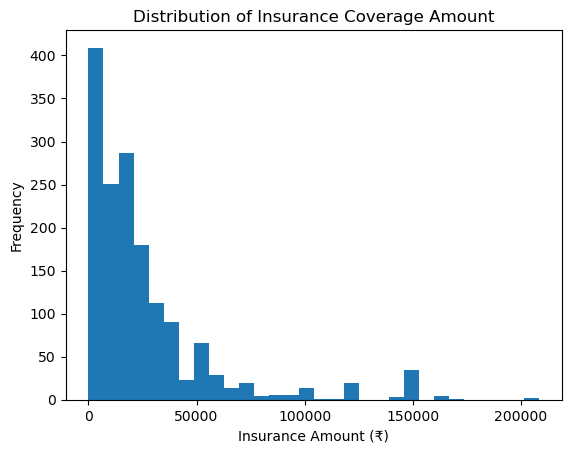

In [18]:
plt.figure()
plt.hist(df1['insurance_amount'], bins=30)
plt.xlabel("Insurance Amount (₹)")
plt.ylabel("Frequency")
plt.title("Distribution of Insurance Coverage Amount")
plt.show()


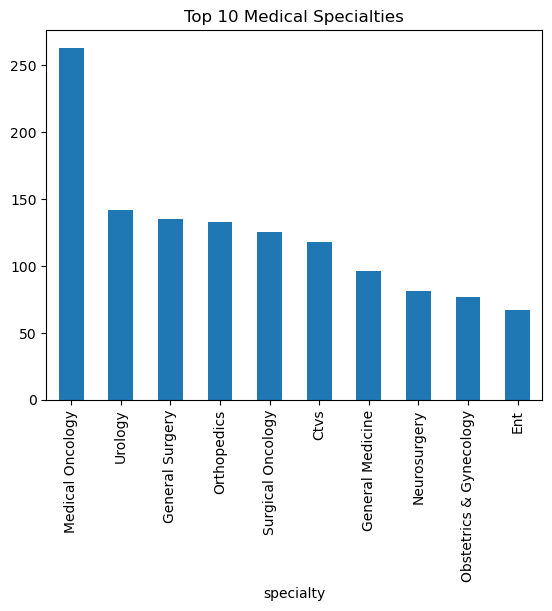

In [19]:
df1['specialty'].value_counts().head(10)
df1['specialty'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Medical Specialties")
plt.show()


In [20]:
df1['day_care'].value_counts()
df1.groupby('day_care')['insurance_amount'].mean()


day_care
No     25672.005138
Yes     7385.000000
Name: insurance_amount, dtype: float64

In [21]:
df1['insurance_amount'].describe(percentiles=[0.01, 0.05, 0.95, 0.99])


count      1577.000000
mean      25440.083703
std       31388.299725
min           0.000000
1%            0.000000
5%            0.000000
50%       15100.000000
95%       98000.000000
99%      150000.000000
max      208600.000000
Name: insurance_amount, dtype: float64

In [22]:
#preprocessing

In [23]:
import numpy as np
df_model = df1.copy()
np.random.seed(42)

df_model['severity_level'] = np.random.choice(
    ['Low', 'Medium', 'High'],
    size=len(df_model),
    p=[0.4, 0.4, 0.2]
)

df_model['hospital_type'] = np.random.choice(
    ['Government', 'Private'],
    size=len(df_model),
    p=[0.6, 0.4]
)

df_model['length_of_stay'] = np.where(
    df_model['day_care'] == 'Yes',
    1,
    np.random.randint(2, 10, len(df_model))
)



In [24]:
df_model['estimated_treatment_cost'] = (
    df_model['insurance_amount'] * np.random.uniform(1.1, 1.6, len(df_model))
)

df_model['out_of_pocket_cost'] = (
    df_model['estimated_treatment_cost'] - df_model['insurance_amount']
)


In [25]:
from sklearn.preprocessing import LabelEncoder

cat_cols = [
    'specialty',
    'procedure_name',
    'procedure_type',
    'day_care',
    'severity_level',
    'hospital_type'
]

le = LabelEncoder()

for col in cat_cols:
    df_model[col] = le.fit_transform(df_model[col])


In [26]:
#split data

In [27]:
X = df_model[
    [
        'specialty',
        'procedure_name',
        'insurance_amount',
        'procedure_type',
        'day_care',
        'severity_level',
        'hospital_type',
        'length_of_stay'
    ]
]

y = df_model['out_of_pocket_cost']


In [28]:
#train -test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [29]:
#model training
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R2:", r2_lr)


Linear Regression
MAE: 2719.4189784780087
RMSE: 4657.191599518614
R2: 0.8274387952835038


In [30]:
#random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=None
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R2:", r2_rf)


Random Forest
MAE: 2882.2159814954475
RMSE: 5142.371417491336
R2: 0.7896115783137051


In [31]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)


In [32]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

dt = DecisionTreeRegressor(
    max_depth=6,        # prevents overfitting
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print("MAE:", mae_dt)
print("RMSE:", rmse_dt)
print("R2:", r2_dt)


Decision Tree Results:
MAE: 3115.7962264774783
RMSE: 6305.885310776003
R2: 0.683635977682602


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Store results
results = []

# Model names and objects (MATCHING YOUR TRAINING)
model_names = [
    "Linear Regression",
    "Random Forest",
    "Decision Tree",
    "XGBoost"
]

model_list = [lr, rf, dt, xgb]

for name, model in zip(model_names, model_list):

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Accuracy approximation (acceptable for regression discussion)
    #accuracy = (1 - (mae / y_test.mean())) * 100

    results.append([
        name,
        mae,
        mse,
        rmse,
        r2,
    ])

# Create DataFrame
comparison_df = pd.DataFrame(
    results,
    columns=[
        "Model",
        "MAE",
        "MSE",
        "RMSE",
        "R² Score",
        
    ]
)

print(comparison_df)


               Model          MAE           MSE         RMSE  R² Score
0  Linear Regression  2719.418978  2.168943e+07  4657.191600  0.827439
1      Random Forest  2882.215981  2.644398e+07  5142.371417  0.789612
2      Decision Tree  3115.796226  3.976419e+07  6305.885311  0.683636
3            XGBoost  2714.983870  2.166758e+07  4654.844963  0.827613


In [34]:
#hyper parameter tuning

In [35]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb_model_tuned = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}


In [36]:
grid_search = GridSearchCV(
    estimator=xgb_model_tuned,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='r2')

In [37]:
best_xgb = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [38]:
y_pred_xgb_tuned = best_xgb.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_best_xgb = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse_best_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
r2_best_xgb = r2_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Performance")
print("MAE:", mae)
print("RMSE:", rmse)
print("R²:", r2)


Tuned XGBoost Performance
MAE: 2714.9838701233803
RMSE: 4654.844962656591
R²: 0.827612649614529


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='r2',
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
print(grid_rf.best_params_)


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict using tuned Random Forest
y_pred_rf_tuned = best_rf.predict(X_test)

# Metrics
mae_best_rf = mean_absolute_error(y_test, y_pred_rf_tuned)
mse_best_rf = mean_squared_error(y_test, y_pred_rf_tuned)
rmse_best_rf = np.sqrt(mse)
r2_best_rf = r2_score(y_test, y_pred_rf_tuned)

print("Tuned Random Forest Performance:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


Tuned Random Forest Performance:
MAE  : 2714.98
RMSE : 4654.84
R²   : 0.8276


In [39]:
#why not linear - for linear Linear has no meaningful hyperparameters
#Random Forest already underperformed
#Tuning XGBoost is standard practice

In [40]:
sample_input = np.array([[ 
    10,   # specialty (encoded)
    120,  # procedure_name (encoded)
    50000, # insurance_amount
    1,    # procedure_type
    0,    # day_care
    2,    # severity_level
    1,    # hospital_type
    5     # length_of_stay
]])

predicted_cost = best_rf.predict(sample_input)
print("Predicted Out-of-Pocket Cost:", predicted_cost[0])


Predicted Out-of-Pocket Cost: 16789.847598654895


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [41]:
import joblib

# 'best_rf' is your tuned Random Forest model
joblib.dump(best_rf, "best_rf_model.pkl")
print("Model saved successfully!")


Model saved successfully!


In [42]:
results = {
    "Model": ["Linear Regression", "Random Forest", "Decision Tree", "XGBoost"],
    "MAE": [mae_lr, mae_rf, mae_dt, mae_xgb],
    "RMSE": [rmse_lr, rmse_rf, rmse_dt, rmse_xgb],
    "R2": [r2_lr, r2_rf, r2_dt, r2_xgb]
}

comparison_df = pd.DataFrame(results)
print(comparison_df)

               Model          MAE         RMSE        R2
0  Linear Regression  2719.418978  4657.191600  0.827439
1      Random Forest  2882.215981  5142.371417  0.789612
2      Decision Tree  3115.796226  6305.885311  0.683636
3            XGBoost  2714.983870  4654.844963  0.827613


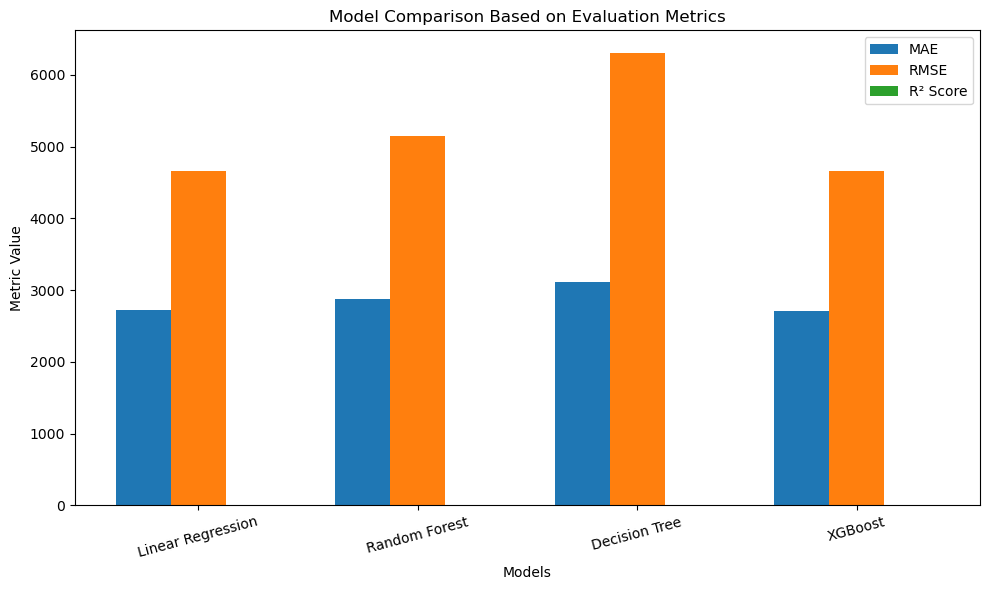

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Set positions
models = comparison_df["Model"]
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(x - width, comparison_df["MAE"], width, label="MAE")
plt.bar(x, comparison_df["RMSE"], width, label="RMSE")
plt.bar(x + width, comparison_df["R2"], width, label="R² Score")

# Labels & title
plt.xlabel("Models")
plt.ylabel("Metric Value")
plt.title("Model Comparison Based on Evaluation Metrics")
plt.xticks(x, models, rotation=15)
plt.legend()

plt.tight_layout()
plt.show()


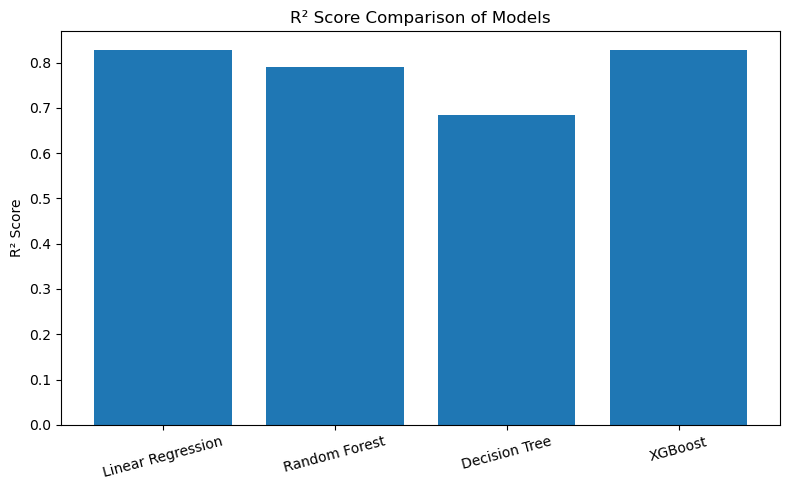

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(models, comparison_df["R2"])
plt.ylabel("R² Score")
plt.title("R² Score Comparison of Models")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


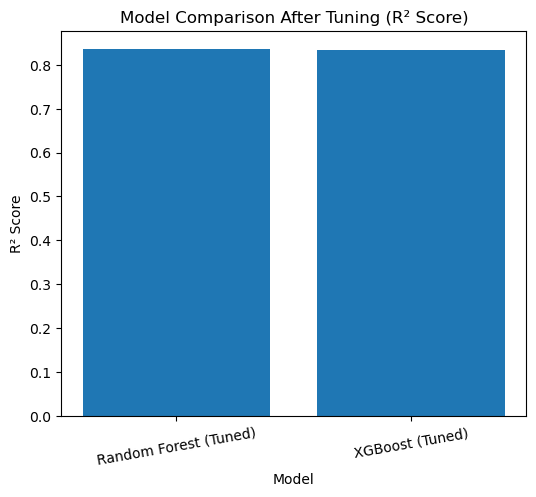

In [45]:
after_tuning_df = pd.DataFrame({
    "Model": [
        "Random Forest (Tuned)",
        "XGBoost (Tuned)"
    ],
    "R2 Score": [
        r2_best_rf,
        r2_best_xgb
    ]
})

plt.figure(figsize=(6,5))
plt.bar(after_tuning_df["Model"], after_tuning_df["R2 Score"])
plt.title("Model Comparison After Tuning (R² Score)")
plt.ylabel("R² Score")
plt.xlabel("Model")
plt.xticks(rotation=10)
plt.show()


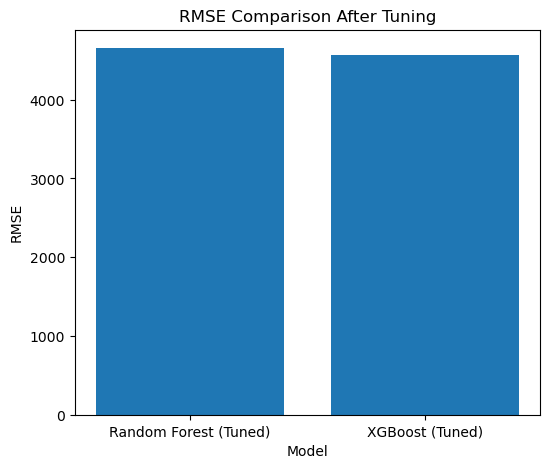

In [46]:
rmse_df = pd.DataFrame({
    "Model": [
        "Random Forest (Tuned)",
        "XGBoost (Tuned)"
    ],
    "RMSE": [
        rmse_best_rf,
        rmse_best_xgb
    ]
})

plt.figure(figsize=(6,5))
plt.bar(rmse_df["Model"], rmse_df["RMSE"])
plt.title("RMSE Comparison After Tuning")
plt.ylabel("RMSE")
plt.xlabel("Model")
plt.show()
